# R054 - Archisha Sinha
# MBA Tech AI

## Domain: Reinforcement Learning
## Topic: Dynamic Programming- Value Iteration Algorithm for MDP


##Value Iteration Algorithm
The Value Iteration algorithm is an efficient dynamic programming technique used to compute the optimal value function Vπ*, which can be used to derive the optimal policy π**


 ## MDP
Markov Decision Process (MDP) is defined by:
A set of states S.
A set of actions A.
A transition probability function P(s′,r∣s,a), which defines the probability of moving to state s′ and receiving reward r, given the agent is in state s and takes action a.
A reward function R(s,a,s′), which specifies the immediate reward after transitioning from state s to state s′ under action a.
A discount factor gamma γ, which determines the importance of future rewards.


##Value Iteration Equation


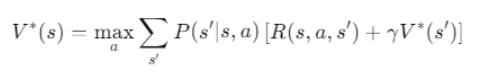

## Value Iteration Algorithm


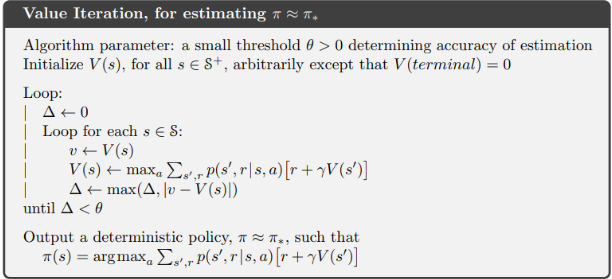

In [1]:
import numpy as np

In [2]:
trans_l=np.array([[0,  0.7, 0.3,  0,   0,     0,     0,   0, ],
                [0,  0,   0,    0.7, 0.3,   0,     0,   0, ],
                [0,  0,   0,    0,   0.7,   0.3,   0,   0, ],
                [0,  0,   0,    0,   0,     0,     0,   0, ],
                [0,  0,   0,    0,   0,     0,     0.7, 0.3, ],
                [0,  0,   0,    0,   0,     0,     0,   1, ],
                [0,  0,   0,    0,   0,     0,     0,   0, ],
                [0,  0,   0,    0,   0,     0,     0,   0, ]])


trans_r=np.array([[0,  0.3, 0.7,  0,   0,     0,     0,   0, ],
                [0,  0,   0,    0.3, 0.7,   0,     0,   0, ],
                [0,  0,   0,    0,   0.3,   0.7,   0,   0, ],
                [0,  0,   0,    0,   0,     0,     0,   0, ],
                [0,  0,   0,    0,   0,     0,     0.3, 0.7, ],
                [0,  0,   0,    0,   0,     0,     0,   1, ],
                [0,  0,   0,    0,   0,     0,     0,   0, ],
                [0,  0,   0,    0,   0,     0,     0,   0, ]])

In [3]:
reward=np.array([0, 2, 1, -1, 3, -3, -7, 5])
policy=np.array(['R', 'R', 'R', '-', 'R', 'R', '-', '-'])
value=np.zeros(8)

In [4]:
print(trans_l)

[[0.  0.7 0.3 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.7 0.3 0.  0.  0. ]
 [0.  0.  0.  0.  0.7 0.3 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.3]
 [0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


In [5]:
print(trans_r)

[[0.  0.3 0.7 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.3 0.7 0.  0.  0. ]
 [0.  0.  0.  0.  0.3 0.7 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.3 0.7]
 [0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


### Policy Evaluation

In [6]:
def policyEvaluation(policy, value, reward):
  df=0.9
  v=np.zeros(8)
  for i in range(len(reward)):
    if policy[i]=='-':
      v[i]=reward[i]

    elif policy[i]=='R':
      sum=0
      for j in range(len(reward)):
        if (trans_r[i, j]==0.7 or trans_r[i, j]==0.3 or trans_r[i, j]==1):
          sum=sum+(trans_r[i, j]*value[j])
      v[i]=reward[i]+df*sum

    elif policy[i]=='L':
      sum=0
      for j in range(len(reward)):
        if (trans_l[i, j]==0.7 or trans_l[i, j]==0.3 or trans_l[i, j]==1):
          sum=sum+(trans_l[i, j]*value[j])
      v[i]=reward[i]+df*sum

  return v

In [7]:
v1=policyEvaluation(policy, value, reward)

print(v1)

[ 0.  2.  1. -1.  3. -3. -7.  5.]


### Policy Improvement

In [8]:
def policyImprovement(policy, value):
  df=0.9
  policy1=['','','','','','','','']
  for i in range(len(reward)):
    if policy[i]=='-':
      policy1[i]='-'

    else:
       sum=0
       v_right=0
       for j in range(len(reward)):
         if (trans_r[i, j]==0.7 or trans_r[i, j]==0.3 or trans_r[i, j]==1):
           sum=sum+(trans_r[i, j]*value[j])
       v_right=df*sum

       sum=0
       v_left=0
       for j in range(len(reward)):
         if (trans_l[i, j]==0.7 or trans_l[i, j]==0.3 or trans_l[i, j]==1):
           sum=sum+(trans_l[i, j]*value[j])
       v_left=df*sum

       if v_left>v_right:
         policy1[i]='L'
       else:
         policy1[i]='R'

  return policy1

In [9]:
p1=policyImprovement(policy, v1)

In [10]:
print(p1)

['L', 'R', 'L', '-', 'R', 'R', '-', '-']


### Value Iteration

In [11]:
def valueIteration(policy, value, reward):
  df=0.9
  v=np.zeros(8)
  policy_new=['','','','','','','','']
  for i in range(10):
    v_prev=np.zeros(8)
    diff=np.zeros(8)
    for i in range(len(reward)):
     if policy[i]=='-':
       v[i]=v[i]+reward[i]
       policy_new[i]='-'

     else:
       sum_l, sum_r, sum=0, 0, 0
       for j in range(len(reward)):
        if (trans_r[i, j]==0.7 or trans_r[i, j]==0.3 or trans_r[i, j]==1):
           sum_r=sum_r+(trans_r[i, j]*v[j])
        if (trans_l[i, j]==0.7 or trans_l[i, j]==0.3 or trans_l[i, j]==1):
           sum_l=sum_l+(trans_l[i, j]*v[j])

        sum=max(sum_l, sum_r)

       v[i]=reward[i]+df*sum
       v_prev=v
       if sum_l>sum_r:
          policy_new[i]='L'
       else:
          policy_new[i]='R'



  return (v, policy_new)

In [12]:
valueIt, policy_new=valueIteration(policy, value, reward)

In [13]:
print(valueIt)
print(policy_new)

[ 15.919614   7.8104    25.3216   -10.        14.34      37.5
 -70.        50.      ]
['R', 'R', 'R', '-', 'R', 'R', '-', '-']


### Comparision based on Time Complexity

In [15]:
import time

In [16]:
# Timing Policy Iteration
start_time = time.time()
v1 = policyEvaluation(policy, value, reward)
p1 = policyImprovement(policy, v1)
end_time = time.time()
print("Policy Iteration Time:", end_time - start_time)

Policy Iteration Time: 0.00042724609375


In [17]:
# Timing Value Iteration
start_time = time.time()
valueIt, policy_new = valueIteration(policy, value, reward)
end_time = time.time()
print("Value Iteration Time:", end_time - start_time)

Value Iteration Time: 0.001600027084350586


In [18]:
# Print Results
print("Value from Policy Iteration:", v1)
print("Policy from Policy Iteration:", p1)
print("Value from Value Iteration:", valueIt)
print("Policy from Value Iteration:", policy_new)

Value from Policy Iteration: [ 0.  2.  1. -1.  3. -3. -7.  5.]
Policy from Policy Iteration: ['L', 'R', 'L', '-', 'R', 'R', '-', '-']
Value from Value Iteration: [ 15.919614   7.8104    25.3216   -10.        14.34      37.5
 -70.        50.      ]
Policy from Value Iteration: ['R', 'R', 'R', '-', 'R', 'R', '-', '-']
